## <strong>Maschinelle Intelligenz und Gesellschaft (MIuG21)</strong>

### Group Project

---
This document guides you through the resolution of the Group Project in the context of the lecture Machine Intelligence and Society. 

This group is made of the <u>**following members**</u> (in no particular order): 
<br></br>
<table width="80%">
    <tr>
    <th>ID Student</th>
    <th>Name</th>
    <th>Program</th>
    </tr>
    <tr> 
    <td><strong>1</strong></td>
    <td>Tomas Bueno dos Santos Momcilovic</td>
    <td>Master Politics & Technology</td>
    </tr>
    <tr> 
    <td><strong>2</strong></td>
    <td>Fabiola Schwarz</td>
    <td>Master Politics & Technology</td>
    </tr>
    <tr> 
    <td><strong>3</strong></td>
    <td>Isaac Bravo</td>
    <td>Master Politics & Technology</td>
    </tr>
    <tr> 
    <td><strong>4</strong></td>
    <td>Haoran Cheng</td>
    <td>Bachelor Elektrotechnik und Informationstechnik</td>
    </tr>
    <tr> 
    <td><strong>5</strong></td>
    <td>Zitong Wang</td>
    <td>Bachelor Elektrotechnik und Informationstechnik</td>
    </tr>
</table>


--

# **Introduction and Topic**
The project is about basic machine learning methods and fairness in machine learning. We would like to see the whole process of building a model: preprocessing, training, cross-validation and testing. The provided dataset is a subset of the [North Carolina Policing Dataset](https://openpolicing.stanford.edu/data/). Get familiar with the dataset but only use the subset we provide.

---

# **Task 1:** Processing and cleaning of data.
_The provided dataset has not been cleaned for you. It is your job to figure out which samples or features to drop, which to use and how to encode them._

---

Step 01: Uploading the data and packages.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('NC_policing.csv')

Step 02: Inspecting the data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402087 entries, 0 to 402086
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   state               402087 non-null  object 
 1   stop_date           402087 non-null  object 
 2   driver_gender       402087 non-null  object 
 3   driver_age          401996 non-null  float64
 4   driver_race_raw     402087 non-null  object 
 5   driver_race         402087 non-null  object 
 6   violation           402087 non-null  object 
 7   search_type         402087 non-null  object 
 8   contraband_found    402087 non-null  bool   
 9   stop_outcome        402087 non-null  object 
 10  search_basis        402087 non-null  object 
 11  officer_id          402087 non-null  int64  
 12  drugs_related_stop  4379 non-null    object 
 13  district            402049 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 40.3+ MB


Step 03: Looking at the features/attributes, checking for missing and NaN values.

In [4]:
print("\033[1mData types:\033[0m\n", data.dtypes, "\n\n\033[1mNull values:\033[0m\n", pd.DataFrame.isnull(data).sum())
print(pd.DataFrame.head(data))
data = data[data['driver_age'].notna()]

#Converting drugs_related_stop NaN into False
data['drugs_related_stop'].fillna(False, inplace=True)

Data types:
 state                  object
stop_date              object
driver_gender          object
driver_age            float64
driver_race_raw        object
driver_race            object
violation              object
search_type            object
contraband_found         bool
stop_outcome           object
search_basis           object
officer_id              int64
drugs_related_stop     object
district               object
dtype: object 

Null values:
 state                      0
stop_date                  0
driver_gender              0
driver_age                91
driver_race_raw            0
driver_race                0
violation                  0
search_type                0
contraband_found           0
stop_outcome               0
search_basis               0
officer_id                 0
drugs_related_stop    397708
district                  38
dtype: int64
  state   stop_date driver_gender  ...  officer_id drugs_related_stop district
0    NC  2000-07-31             M  ... 

Step 04: Inspecting unique values to be encoded.

In [5]:
#Define a function to print the unique values in columns
def print_unique(data, col_names):
    for col in col_names:
        print(f"\033[4m{col}\033[0m", ': ', data[col].unique())

#Limit to columns with exhaustive (or truncated) unique values
columns = list(data.columns.values.tolist())
columns.remove('search_basis')
print(f"\033[1mColumns of the dataset:\n\033[0m{columns} \n")
print('\033[1mUnique values in each column:\033[0m')
print_unique(data, columns)

#Check if driver_race_raw communicates anything specific about the sample
print("\n\033[1mRelationship b/w race and race_raw:\033[0m\n",data.groupby(["driver_race", "driver_race_raw"]).size())

Columns of the dataset:
['state', 'stop_date', 'driver_gender', 'driver_age', 'driver_race_raw', 'driver_race', 'violation', 'search_type', 'contraband_found', 'stop_outcome', 'officer_id', 'drugs_related_stop', 'district'] 

Unique values in each column:
state :  ['NC']
stop_date :  ['2000-07-31' '2000-08-01' '2000-08-02' ... '2015-12-29' '2015-12-30'
 '2015-12-31']
driver_gender :  ['M' 'F']
driver_age :  [23. 29. 49. 24. 21. 33. 16. 28. 39. 68. 20. 40. 50. 57. 38. 46. 34. 44.
 22. 36. 53. 32. 15. 27. 26. 41. 48. 25. 47. 42. 52. 17. 76. 61. 31. 30.
 64. 37. 19. 51. 18. 35. 59. 73. 43. 45. 66. 65. 54. 58. 55. 75. 63. 56.
 60. 81. 62. 77. 67. 69. 87. 70. 71. 78. 74. 85. 72. 79. 93. 80. 89. 82.
 84. 91. 83. 90. 88. 86. 92. 98. 99. 94. 96.]
driver_race_raw :  ['W N' 'B N' 'U H' 'W H' 'I N' 'U N' 'A N' 'A H' 'B H' 'I H']
driver_race :  ['White' 'Black' 'Hispanic' 'Other' 'Asian']
violation :  ['Speeding' 'DUI' 'Equipment' 'Seat belt' 'Other' 'Registration/plates'
 'Safe movement' 'Stop si

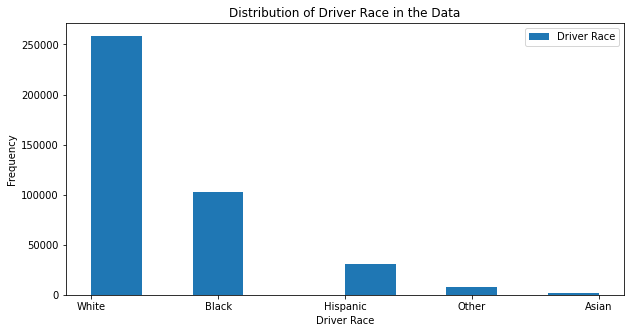

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data['driver_race'], label='Driver Race')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Driver Race')
plt.title("Distribution of Driver Race in the Data")
plt.show()

Step 04: Encoding categorical attributes.

In [6]:
#Using LabelEncoder() for binary variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_encoded = data.copy()
data_encoded.loc[:, ('contraband_found')] = encoder.fit_transform(data_encoded.loc[:, ('contraband_found')])
data_encoded.loc[:, ('driver_gender')] = encoder.fit_transform(data_encoded.loc[:, ('driver_gender')])
data_encoded.loc[:, ('drugs_related_stop')] = encoder.fit_transform(data_encoded.loc[:, ('drugs_related_stop')])

#Dictionary encoding where different order is needed
data_encoded.loc[:, ('stop_outcome')] = data_encoded.replace( {"Arrest": 1, "No Action": 0} )

#One-hot encoding for categorical dummy variables
one_hot = pd.get_dummies(data_encoded.loc[:, ('driver_race')], prefix='race')
data_encoded = data_encoded.drop('driver_race',axis = 1)
data_encoded = data_encoded.join(one_hot)
data_encoded = data_encoded.drop(['driver_race_raw','district','officer_id', 'state', 'stop_date'], axis = 1)

data_encoded.head()

,driver_gender,driver_age,violation,search_type,contraband_found,stop_outcome,search_basis,drugs_related_stop,race_Asian,race_Black,race_Hispanic,race_Other,race_White
0,1,23.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,0,0,0,1
1,0,29.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,0,0,0,1
2,0,49.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,1,0,0,0
3,1,29.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,1,0,0,0
4,1,24.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,0,1,0,0


In [ ]:
data_encoded['search_basis'].unique()

array(['No Search Conducted', 'Observation Suspected Contraband',
       'Erratic Suspicious Behaviour', 'Other Official Info',
       'Suspicious Movement', 'Witness Observation', 'Informant Tip',
       'Observation Suspected Contraband,Other Official Info',
       'Erratic Suspicious Behaviour,Witness Observation',
       'Erratic Suspicious Behaviour,Observation Suspected Contraband',
       'Erratic Suspicious Behaviour,Other Official Info',
       'Other Official Info,Witness Observation',
       'Observation Suspected Contraband,Witness Observation',
       'Erratic Suspicious Behaviour,Observation Suspected Contraband,Other Official Info',
       'Erratic Suspicious Behaviour,Observation Suspected Contraband,Other Official Info,Suspicious Movement',
       'Observation Suspected Contraband,Informant Tip',
       'Observation Suspected Contraband,Other Official Info,Suspicious Movement,Informant Tip,Witness Observation',
       'Erratic Suspicious Behaviour,Other Official Info,I

In [7]:
#Encoding violation based on specific keywords
data_encoded['speeding_violation'] = np.where(data_encoded['violation'].str.find('Speed') != -1, 1, 0)
data_encoded['dui_violation'] = np.where(data_encoded['violation'].str.find('DUI') != -1, 1, 0)
data_encoded['equipment_violation'] = np.where(data_encoded['violation'].str.find('Equip') != -1, 1, 0)
data_encoded['seatbelt_violation'] = np.where(data_encoded['violation'].str.find('Seat') != -1, 1, 0)
data_encoded['other_violation'] = np.where(data_encoded['violation'].str.find('Other') != -1, 1, 0)
data_encoded['registration_violation'] = np.where(data_encoded['violation'].str.find('Registration') != -1, 1, 0)
data_encoded['unsafe_violation'] = np.where(data_encoded['violation'].str.find('Safe') != -1, 1, 0)
data_encoded['stop_violation'] = np.where(data_encoded['violation'].str.find('Stop') != -1, 1, 0)

#Encoding search_type based on specific keywords
data_encoded['no_search'] = np.where(data_encoded['search_type'].str.find('Search') != -1, 1, 0)
data_encoded['protective_frisk'] = np.where(data_encoded['search_type'].str.find('Protective') != -1, 1, 0)
data_encoded['incident'] = np.where(data_encoded['search_type'].str.find('Incident') != -1, 1, 0)
data_encoded['consensual_search'] = np.where(data_encoded['search_type'].str.find('Consent') != -1, 1, 0)
data_encoded['probable_cause'] = np.where(data_encoded['search_type'].str.find('Probable') != -1, 1, 0)
data_encoded['warrant'] = np.where(data_encoded['search_type'].str.find('Warrant') != -1, 1, 0)

#Encoding search_basis based on specific keywords
data_encoded['erratic_behavior'] = np.where(data_encoded['search_basis'].str.find('Erratic') != -1, 1, 0)
data_encoded['informant_tip'] = np.where(data_encoded['search_basis'].str.find('Informant') != -1, 1, 0)
data_encoded['contraband_observed'] = np.where(data_encoded['search_basis'].str.find('Contraband') != -1, 1, 0)
data_encoded['suspicious_movement'] = np.where(data_encoded['search_basis'].str.find('Movement') != -1, 1, 0)
data_encoded['witness_observation'] = np.where(data_encoded['search_basis'].str.find('Witness') != -1, 1, 0)
data_encoded['other_info'] = np.where(data_encoded['search_basis'].str.find('Official') != -1, 1, 0)

data_encoded.head()

,driver_gender,driver_age,violation,search_type,contraband_found,stop_outcome,search_basis,drugs_related_stop,race_Asian,race_Black,race_Hispanic,race_Other,race_White,speeding_violation,dui_violation,equipment_violation,seatbelt_violation,other_violation,registration_violation,unsafe_violation,stop_violation,no_search,protective_frisk,incident,consensual_search,probable_cause,warrant,erratic_behavior,informant_tip,contraband_observed,suspicious_movement,witness_observation,other_info
0,1,23.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,29.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,49.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,29.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,24.0,Speeding,No Search Conducted,0,1,No Search Conducted,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Descriptive Statistics: Shares of observations per race and other attributes.


In [ ]:
data_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
driver_gender,401996.0,0.905325,0.292766,0.0,1.0,1.0,1.0,1.0
driver_age,401996.0,41.878103,13.019045,15.0,32.0,42.0,52.0,99.0
contraband_found,401996.0,0.016662,0.128001,0.0,0.0,0.0,0.0,1.0
stop_outcome,401996.0,0.307899,0.461625,0.0,0.0,0.0,1.0,1.0
drugs_related_stop,401996.0,0.010888,0.103777,0.0,0.0,0.0,0.0,1.0
race_Asian,401996.0,0.004415,0.066302,0.0,0.0,0.0,0.0,1.0
race_Black,401996.0,0.255965,0.436403,0.0,0.0,0.0,1.0,1.0
race_Hispanic,401996.0,0.076371,0.265592,0.0,0.0,0.0,0.0,1.0
race_Other,401996.0,0.020271,0.140927,0.0,0.0,0.0,0.0,1.0
race_White,401996.0,0.642977,0.479122,0.0,0.0,1.0,1.0,1.0


Step 05: Ploting a Correlation Matrix.

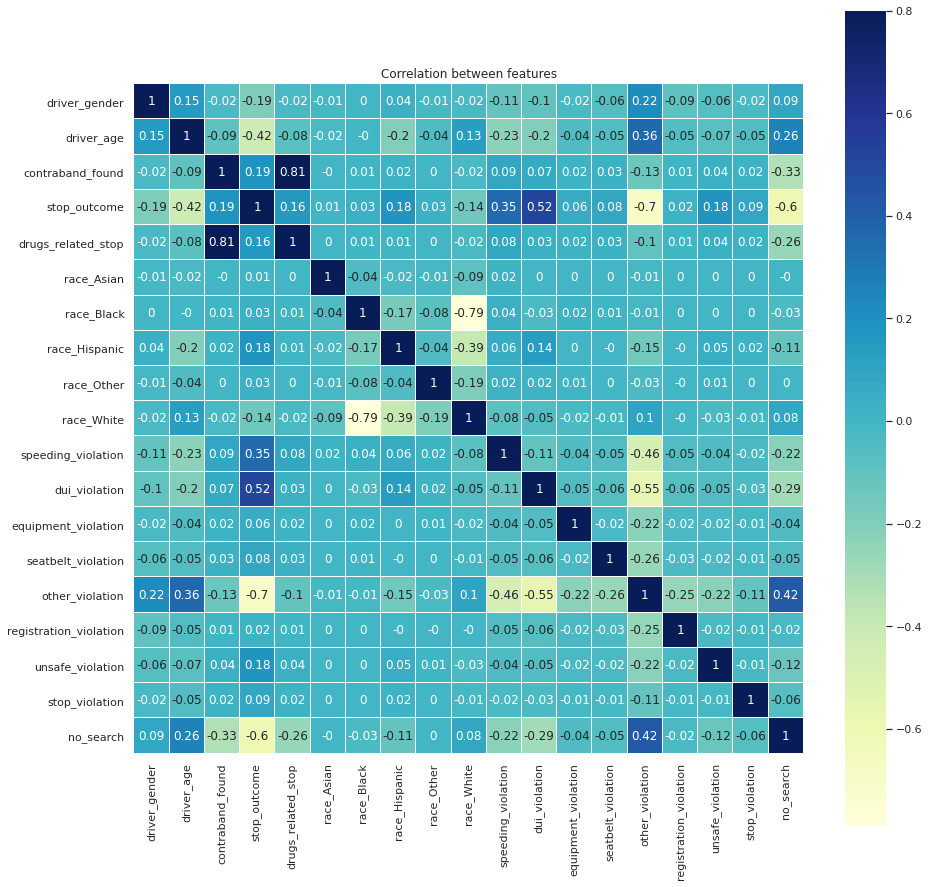

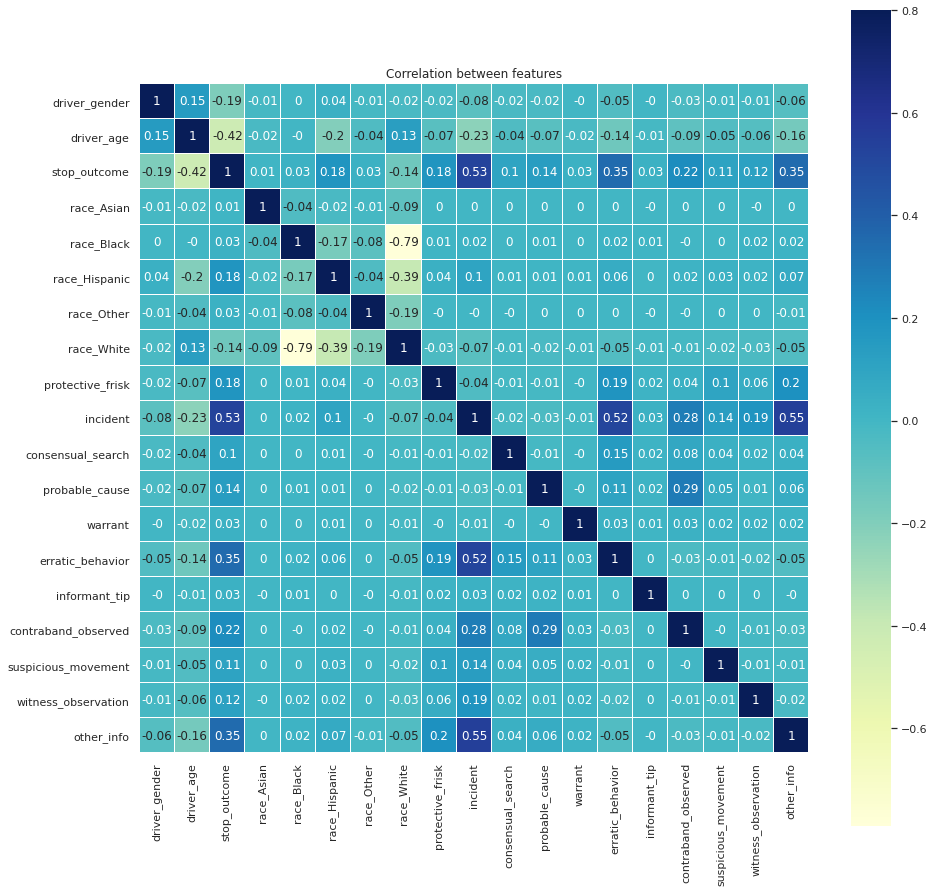

In [ ]:
#Using the heatmap from the seaborn package

corr = round(data_encoded.corr(),2)
corr_1 = corr.iloc[0:19,0:19]
corr_2 = corr.iloc[[0,1,3,5,6,7,8,9,19,20,21,22,23,24,25,26,27,28,29],
                  [0,1,3,5,6,7,8,9,19,20,21,22,23,24,25,26,27,28,29]]

#Correlations between sensitive attributes, stop_outcome, violations and contraband
plt.figure(figsize=(15, 15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.heatmap(corr_1, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

#Correlations between sensitive attributes, stop_outcome, search_basis and search_type
plt.figure(figsize=(15, 15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.heatmap(corr_2, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

# **Task 2:** Clasification Models.
_The task is to classify if a person will be arrested (stop_outcome). Generate two binary classifiers using two different methods of your liking and compare their performances against a dummy classifier which always predicts not arrested._

---



### k-NN Classifier


In [8]:
#Separating predictors and the outcome into respective X and y matrices
X = data_encoded[['driver_age','race_White','erratic_behavior','contraband_observed','race_Hispanic','contraband_found','driver_gender','speeding_violation',
                  'dui_violation', 'other_violation', 'unsafe_violation', 'no_search', 'protective_frisk', 'incident', 'probable_cause']]
y = data_encoded['stop_outcome']
print(X,y)

#Splitting the matrices into training, validation and test set
from sklearn.model_selection import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_train, X_valid, y_train, y_valid = train_test_split(X_cv, y_cv, test_size=0.3, stratify=y_cv, random_state=7)

        driver_age  race_White  ...  incident  probable_cause
0             23.0           1  ...         0               0
1             29.0           1  ...         0               0
2             49.0           0  ...         0               0
3             29.0           0  ...         0               0
4             24.0           0  ...         0               0
...            ...         ...  ...       ...             ...
402082        18.0           1  ...         0               1
402083        21.0           0  ...         1               0
402084        29.0           1  ...         1               0
402085        18.0           1  ...         0               1
402086        31.0           0  ...         1               0

[401996 rows x 15 columns] 0         1
1         1
2         1
3         1
4         1
         ..
402082    1
402083    1
402084    1
402085    1
402086    1
Name: stop_outcome, Length: 401996, dtype: int64


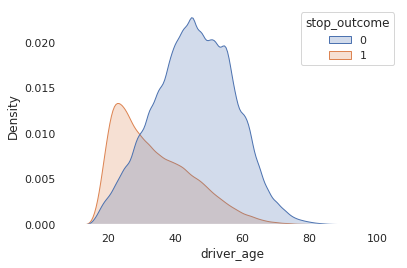

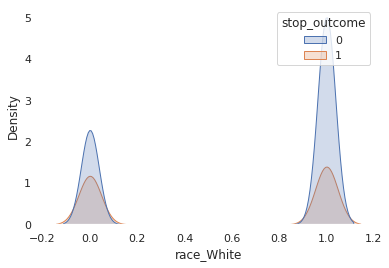

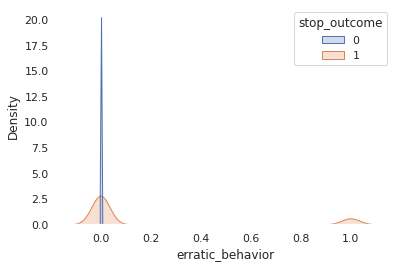

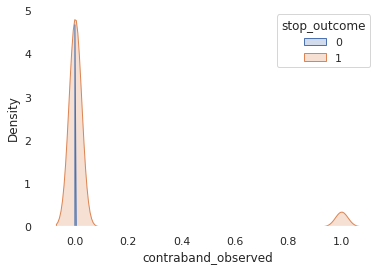

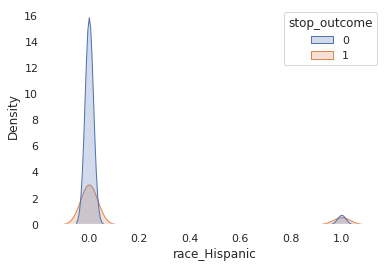

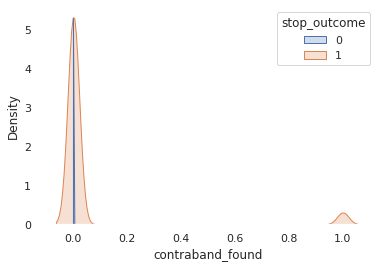

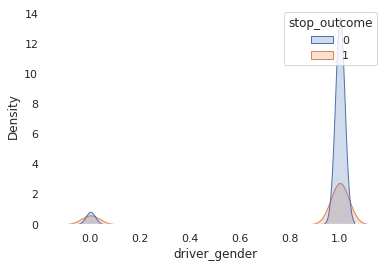

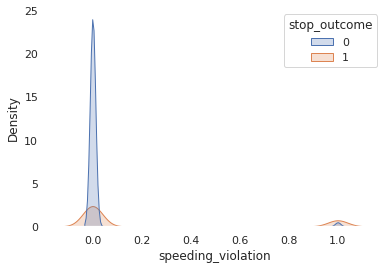

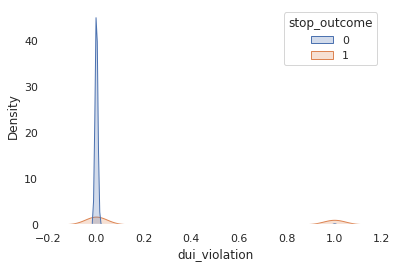

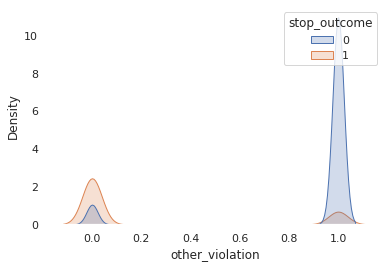

In [ ]:
# Plot outputs appear and are stored within the notebook
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

for i, (column, color) in enumerate(zip(X.columns, sns.color_palette())):
    plt.figure(i)
    sns.kdeplot(x=column, fill=True, hue=y, data=X, color=color)

In [9]:
from sklearn.preprocessing import StandardScaler
# Creating a scaler object (here with default settings)
scaler = StandardScaler()
# Replacing the values in our training, validation and test X's by the normalized ones
X_train.values[:] = scaler.fit_transform(X_train)
X_valid.values[:] = scaler.transform(X_valid)
X_test.values[:] = scaler.transform(X_test)

In [ ]:
#Process of selecting the hyperparameter k for a k-NN classifier
#Warning: takes 15 minutes to process; de-comment run only if you want to confirm
#Credit for the idea goes to an unknown classmate who shared his process in class
'''from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
score_knn = []
k_range = range(1,51)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_age_white, y_train_age_white)
    y_pred_age_white = knn.predict(X_valid_age_white)
    score_knn.append(accuracy_score(y_valid_age_white, y_pred_age_white))

plt.plot(k_range, score_knn)
plt.xlabel('k value')
plt.ylabel('Accuracy score')
plt.show() '''

"from sklearn.metrics import accuracy_score\nfrom sklearn.neighbors import KNeighborsClassifier\nscore_knn = []\nk_range = range(1,51)\nfor k in k_range:\n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train_age_white, y_train_age_white)\n    y_pred_age_white = knn.predict(X_valid_age_white)\n    score_knn.append(accuracy_score(y_valid_age_white, y_pred_age_white))\n\nplt.plot(k_range, score_knn)\nplt.xlabel('k value')\nplt.ylabel('Accuracy score')\nplt.show() "

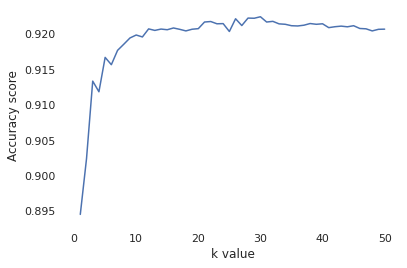

In [ ]:
#We have saved the values from the for loop separately

k_range = range(1,51)

score_knn = [0.8945273631840795, 0.9023809523809524, 0.913361762615494, 0.9118573797678275, 0.9167140488036011, 0.9156834873252784, 0.9177090736792229, 
0.9185737976782753, 0.9194622127457949, 0.9198768064439706, 0.919604359156598, 0.920741530443023, 0.9205283108268183, 0.9207178393745558, 0.9206230751006871, 
0.9208718313195925, 0.920682302771855, 0.9204572376214167, 0.9206941483060886, 0.9207770670457237, 0.9217128642501777, 0.9217839374555793, 0.9214641080312722, 
0.9214877990997394, 0.9203743188817816, 0.9221748400852878, 0.9212153518123667, 0.9222696043591566, 0.9222459132906894, 0.9224591329068941, 0.9217128642501777, 
0.9218076285240464, 0.9214522624970386, 0.9213930348258706, 0.9211916607438996, 0.9211561241411987, 0.9212627339493011, 0.921499644633973, 0.9213930348258706, 
0.9214641080312722, 0.9209192134565269, 0.9210495143330965, 0.9211324330727316, 0.9210376687988628, 0.9211916607438996, 0.9208007581141909, 0.9207533759772566, 
0.9204572376214167, 0.920682302771855, 0.9207059938403221]

plt.plot(k_range, score_knn)
plt.xlabel('k value')
plt.ylabel('Accuracy score')
plt.show()

In [10]:
#Final version of the kNN model
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNN with n_neighbors=30 (k=30)
knn = KNeighborsClassifier(n_neighbors=30)
# Train the model on the training set with the encoded labels
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

<Figure size 432x288 with 0 Axes>

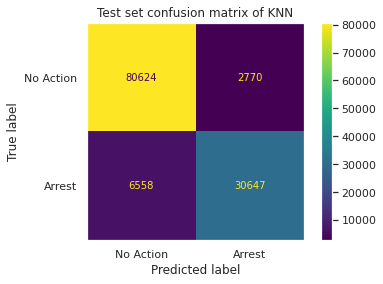

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix for the test set for the KNN classifier
plt.figure()
plot_confusion_matrix(knn, X_test, y_test, display_labels=['No Action','Arrest'], values_format='d')
plt.grid(False)
plt.title('Test set confusion matrix of KNN')
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#True/false positives/negatives of the kNN
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(y_test, knn.predict(X_test)).ravel()
print('True Positive of KNN:\t', tp_knn)
print('True Negative of KNN:\t',tn_knn)
print('False Positive of KNN:\t', fp_knn)
print('False Negative of KNN:\t', fn_knn)

#Accuracy
accuracy_knn = metrics.accuracy_score(y_test, knn.predict(X_test))
print('The Accuracy:',round(accuracy_knn,2))

True Positive of KNN:	 30647
True Negative of KNN:	 80624
False Positive of KNN:	 2770
False Negative of KNN:	 6558
The Accuracy: 0.92


In [12]:
#Standard metrics of performance: recall and precision
recall_knn_manual = tp_knn/(tp_knn + fn_knn)
precision_knn_manual = tp_knn/(tp_knn + fp_knn)

print('Recall of KNN:\t\t',round(recall_knn_manual,2))
print('Precision of KNN:\t',round(precision_knn_manual,2))

#F1 metric of performance
f1_knn_manual = 2 * precision_knn_manual * recall_knn_manual / (precision_knn_manual + recall_knn_manual)

print('F1 of KNN:\t\t',round(f1_knn_manual,2))


Recall of KNN:		 0.82
Precision of KNN:	 0.92
F1 of KNN:		 0.87


[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.        ]


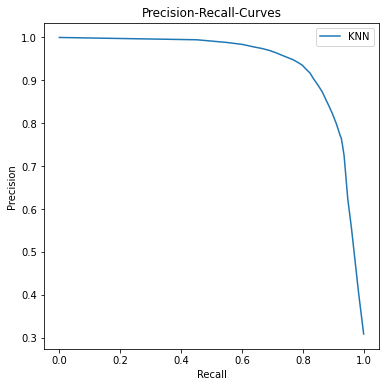

In [13]:
from sklearn.metrics import precision_recall_curve

precision_knn, recall_knn, thresholds = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])

print(thresholds)
#Plot the curve
plt.figure(figsize=[6,6])
plt.plot(recall_knn, precision_knn, label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall-Curves')
plt.legend(loc='upper right')
plt.show()

Train: [2.         1.         0.96666667 0.93333333 0.9        0.86666667
 0.83333333 0.8        0.76666667 0.73333333 0.7        0.66666667
 0.63333333 0.6        0.56666667 0.53333333 0.5        0.46666667
 0.43333333 0.4        0.36666667 0.33333333 0.3        0.26666667
 0.23333333 0.2        0.16666667 0.13333333 0.1        0.06666667
 0.03333333 0.        ]
Test: [2.         1.         0.96666667 0.93333333 0.9        0.86666667
 0.83333333 0.8        0.76666667 0.73333333 0.7        0.66666667
 0.63333333 0.6        0.56666667 0.53333333 0.5        0.46666667
 0.43333333 0.4        0.36666667 0.33333333 0.3        0.26666667
 0.23333333 0.2        0.16666667 0.13333333 0.1        0.06666667
 0.03333333 0.        ]


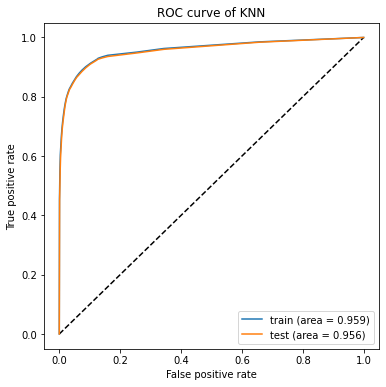

In [14]:
from sklearn.metrics import roc_curve, auc

#Calculate the false positive and true positive rates for training and test set
fpr_train_knn, tpr_train_knn, thresholds = roc_curve(y_train, knn.predict_proba(X_train)[:, 1])
print('Train:',thresholds)
fpr_test_knn, tpr_test_knn, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
print('Test:',thresholds)
#Calculate the area under the curve
auc_train_knn = auc(fpr_train_knn, tpr_train_knn)
auc_test_knn = auc(fpr_test_knn, tpr_test_knn)

#Plot the ROC curve
plt.figure(figsize=[6,6])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train_knn, tpr_train_knn, label='train (area = {:.3f})'.format(auc_train_knn))
plt.plot(fpr_test_knn, tpr_test_knn, label='test (area = {:.3f})'.format(auc_test_knn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of KNN')
plt.legend(loc='lower right')
plt.show()

### Decision Tree classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#It is possible to let DecisionTreeClassifier pick the hyperparameters
#However, in that case we do not know if there is a marginally worse but smaller combination
dct = DecisionTreeClassifier(criterion = 'gini')
dct.fit(X_train, y_train)
y_pred = dct.predict(X_valid)
print("Default score:\t", round(accuracy_score(y_valid, y_pred),4))

Default score:	 0.9251


In [ ]:
#Process of selecting the three hyperparameters in the DcT classifier
#Note: Process is much faster for DcT than for kNN
'''
score_dct = []

for md in range(1,11):
    for mss in range(2,12):
        for mln in range(2,12):
            dct = DecisionTreeClassifier(max_depth = md, min_samples_split = mss, max_leaf_nodes = mln, criterion = 'gini')
            dct.fit(X_train, y_train)
            y_pred = dct.predict(X_valid)
            score_dct.append(accuracy_score(y_valid, y_pred))

best_lowest_score = []

for md in range(1,11):
    for mss in range(2,12):
        for mln in range(2,12):
            best_lowest_score.append(str(md)+"-"+str(mss)+"-"+str(mln))
            
print("Best lowest score:",best_lowest_score[406])
'''

'\nscore_dct = []\n\nfor md in range(1,11):\n    for mss in range(2,12):\n        for mln in range(2,12):\n            dct = DecisionTreeClassifier(max_depth = md, min_samples_split = mss, max_leaf_nodes = mln, criterion = \'gini\')\n            dct.fit(X_train, y_train)\n            y_pred = dct.predict(X_valid)\n            score_dct.append(accuracy_score(y_valid, y_pred))\n\nbest_lowest_score = []\n\nfor md in range(1,11):\n    for mss in range(2,12):\n        for mln in range(2,12):\n            best_lowest_score.append(str(md)+"-"+str(mss)+"-"+str(mln))\n            \nprint("Best lowest score:",best_lowest_score[406])\n'

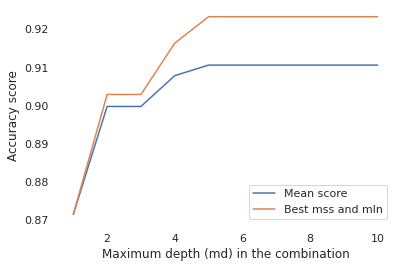

In [116]:
#We have saved the values from the nested for loops separately
#and found the best score is from the lowest combination md = 5, mss = 2, mln = 8

dct_range_lower = [0,100,200,300,400,500,600,700,800,900]
dct_range_some = ['1-*-*','2-*-*', '3-*-*', '4-*-*','5-*-*', '6-*-*', '7-*-*','8-*-*', '9-*-*', '10-*-*']

score_dct_mean = [0.871452262497039,0.8997358445865911,0.8997358445865911,0.9078026533996684,0.9105697701966361,
                   0.9105697701966361,0.9105697701966361,0.9105697701966361,0.9105697701966361,0.9105697701966361]
score_dct_max = [0.8714522624970387,0.9028784648187633,0.9028784648187633,0.9163231461738924,0.9232409381663113,
                 0.9232409381663113,0.9232409381663113,0.9232409381663113,0.9232409381663113,0.9232409381663113]

#plt.figure(figsize=(6,4))
plt.plot(range(1,11), score_dct_mean, label='Mean score')
plt.plot(range(1,11), score_dct_max, label = 'Best mss and mln')
plt.legend()
plt.xlabel('Maximum depth (md) in the combination')
plt.ylabel('Accuracy score')
plt.show()



In [16]:
#Final version of the DcT model
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the decision tree classifier with the predefined parameters
dct = DecisionTreeClassifier(max_depth=5, min_samples_split=2, max_leaf_nodes=8, criterion='gini')

# Train the model using the training set
dct.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

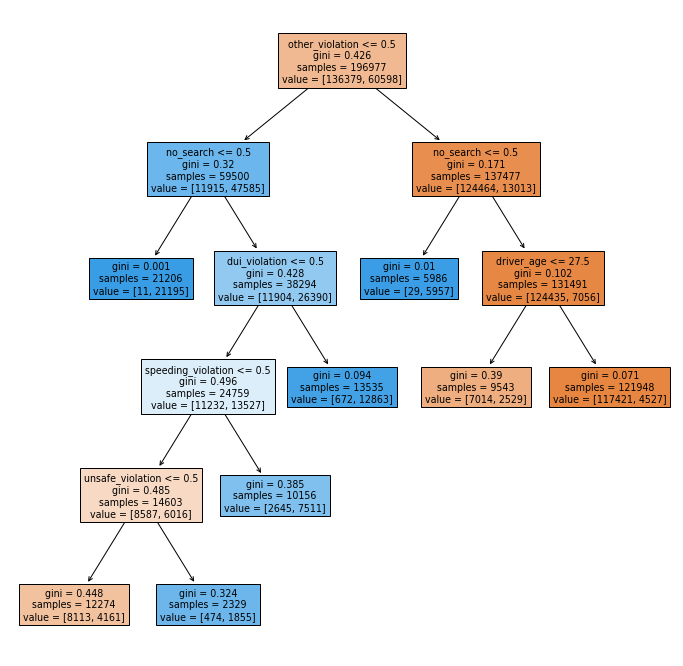

In [17]:
# Plot a graphical representation of the splits within the grown decision tree
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(12,12))
out = plot_tree(dct, filled=True, feature_names=X_train.columns)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

<Figure size 432x288 with 0 Axes>

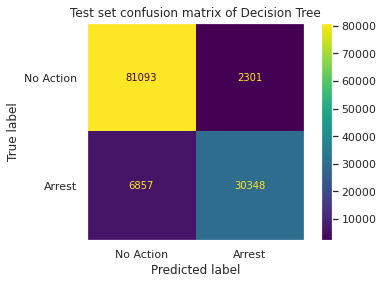

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix for the test set for the Decision Tree classifier
plt.figure()
plot_confusion_matrix(dct, X_test, y_test, display_labels=['No Action','Arrest'], values_format='d')
plt.grid(False)
plt.title('Test set confusion matrix of Decision Tree')
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix

#For the Decision Tree
tn_dct, fp_dct, fn_dct, tp_dct = confusion_matrix(y_test, dct.predict(X_test)).ravel()
accuracy_dct = metrics.accuracy_score(y_test, dct.predict(X_test))

print('True Positive of DCT:\t', tp_dct)
print('True Negative of DCT:\t',tn_dct)
print('False Positive of DCT:\t', fp_dct)
print('False Negative of DCT:\t', fn_dct)
print('Accuracy of DCT:\t', round(accuracy_dct,2))


True Positive of DCT:	 30348
True Negative of DCT:	 81093
False Positive of DCT:	 2301
False Negative of DCT:	 6857
Accuracy of DCT:	 0.92


In [19]:
recall_dct_manual = tp_dct/(tp_dct + fn_dct)
precision_dct_manual = tp_dct/(tp_dct + fp_dct)

print('Recall of DCT:\t\t',round(recall_dct_manual,2))
print('Precision of DCT:\t',round(precision_dct_manual,2))

f1_dct_manual = 2 * precision_dct_manual * recall_dct_manual / (precision_dct_manual + recall_dct_manual)

print('F1 of DCT:\t\t',round(f1_dct_manual,2))

Recall of DCT:		 0.82
Precision of DCT:	 0.93
F1 of DCT:		 0.87


[0.03712238 0.265011   0.33900929 0.73956282 0.79647918 0.95035094
 0.99515536 0.99948128]


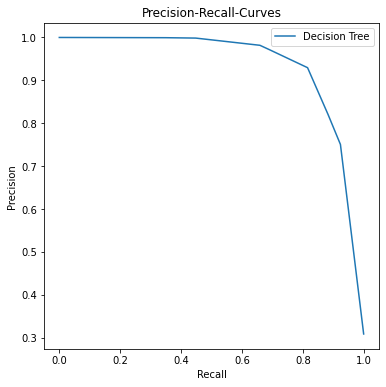

In [20]:
from sklearn.metrics import precision_recall_curve

precision_dct, recall_dct, thresholds = precision_recall_curve(y_test, dct.predict_proba(X_test)[:, 1])

print(thresholds)
#Plot the curve
plt.figure(figsize=[6,6])
plt.plot(recall_dct, precision_dct, label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall-Curves')
plt.legend(loc='upper right')
plt.show()

[1.99948128 0.99948128 0.99515536 0.95035094 0.79647918 0.73956282
 0.33900929 0.265011   0.03712238]


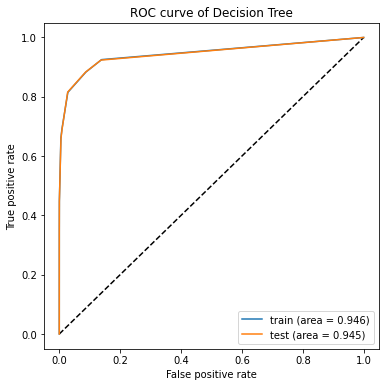

In [21]:
from sklearn.metrics import roc_curve, auc

#Calculate the false positive and true positive rates for training and test set
fpr_train_dct, tpr_train_dct, thresholds = roc_curve(y_train, dct.predict_proba(X_train)[:, 1])
fpr_test_dct, tpr_test_dct, thresholds = roc_curve(y_test, dct.predict_proba(X_test)[:, 1])

print(thresholds)
#Calculate the area under the curve
auc_train_dct = auc(fpr_train_dct, tpr_train_dct)
auc_test_dct = auc(fpr_test_dct, tpr_test_dct)

#Plot the ROC curve
plt.figure(figsize=[6,6])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train_dct, tpr_train_dct, label='train (area = {:.3f})'.format(auc_train_dct))
plt.plot(fpr_test_dct, tpr_test_dct, label='test (area = {:.3f})'.format(auc_test_dct))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of Decision Tree')
plt.legend(loc='lower right')
plt.show()

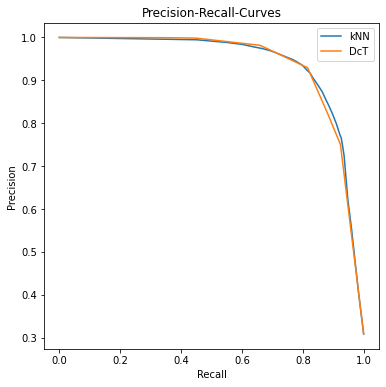

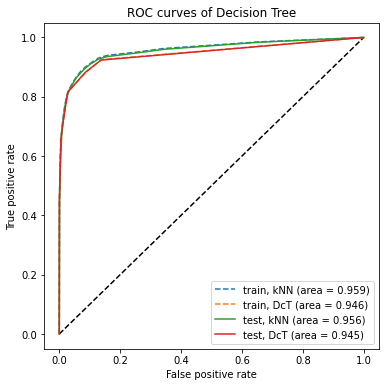

In [26]:
#PRC for kNN and DcT
plt.figure(figsize=[6,6])
plt.plot(recall_knn, precision_knn, label='kNN')
plt.plot(recall_dct, precision_dct, label='DcT')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall-Curves')
plt.legend(loc='upper right')
plt.show()

#ROC for kNN and DcT
plt.figure(figsize=[6,6])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train_knn, tpr_train_knn, '--', label='train, kNN (area = {:.3f})'.format(auc_train_knn))
plt.plot(fpr_train_dct, tpr_train_dct, '--', label='train, DcT (area = {:.3f})'.format(auc_train_dct))
plt.plot(fpr_test_knn, tpr_test_knn, label='test, kNN (area = {:.3f})'.format(auc_test_knn))
plt.plot(fpr_test_dct, tpr_test_dct, label='test, DcT (area = {:.3f})'.format(auc_test_dct))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves of Decision Tree')
plt.legend(loc='lower right')
plt.show()

# **Task 3:** Classification and Evaluation of Classifiers.

_Which of the features in the dataset are suitable to form groups that can be checked for fairness. Use the results of one of your classifiers to calculate independence, separation and sufficiency for those groups. What do you notice?_

In [ ]:
print('\t\t KNN\t', 'DCT')
print('True Positive:\t', tp_knn,'\t', tp_dct)
print('True Negative:\t',tn_knn,'\t',tn_dct)
print('False Positive:\t', fp_knn,'\t', fp_dct)
print('False Negative:\t', fn_knn,'\t', fn_dct)
print('Recall:\t\t',round(recall_knn_manual,2),'\t',round(recall_dct_manual,2))
print('Precision:\t',round(precision_knn_manual,2),'\t',round(precision_dct_manual,2))
print('F1:\t\t',round(f1_knn_manual,2),'\t',round(f1_dct_manual,2))
print("Accuracy:\t", round(accuracy_knn, 2), "\t", round(accuracy_dct, 2))

		 KNN	 DCT
True Positive:	 30647 	 30348
True Negative:	 80624 	 81093
False Positive:	 2770 	 2301
False Negative:	 6558 	 6857
Recall:		 0.82 	 0.82
Precision:	 0.92 	 0.93
F1:		 0.87 	 0.87
Accuracy:	 0.92 	 0.92


Because there is only marginal difference between the performance of kNN and DcT, we have decided to use kNN. We have also checked both confusion matrices for both Hispanic- and White-only observations, to confirm the marginal difference there as well. We further use kNN values for independence, sufficiency and separation for comparison, but we conducted the same calculations for DcT, to demonstrate that it had similar results.

## kNN: Performance and Fairness



In [28]:
from sklearn.metrics import confusion_matrix

#Separating the dataset into groups
#i.e. subsets of race_White and race_Hispanic
group_a = X_test["race_White"] == 1
group_b = X_test["race_Hispanic"] == 1

cm_a = confusion_matrix(y_test[group_a], knn.predict(X_test)[group_a])
cm_b = confusion_matrix(y_test[group_b], knn.predict(X_test)[group_b])

tn_a, fp_a, fn_a, tp_a = cm_a.ravel()
tn_b, fp_b, fn_b, tp_b = cm_b.ravel()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


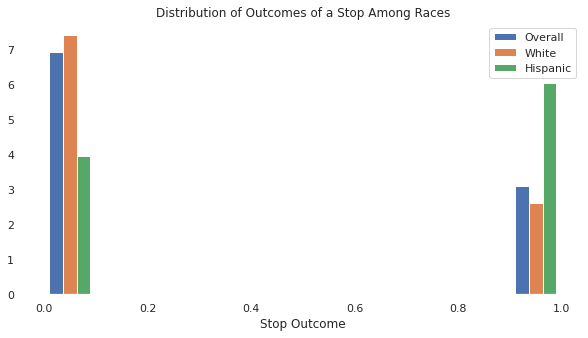

In [ ]:
%plt.figure(figsize=(10,5))
%plt.hist([y_test, y_test[group_a], y_test[group_b]], density=True, 
%           label=['Overall', 'White', 'Hispanic'])

%plt.xlabel('Stop Outcome')
%plt.title('Distribution of Outcomes of a Stop Among Races')
%plt.legend(loc='upper right')
%plt.show()

In [ ]:
#Conventional metrics
print("Metric\t\t\t race_White\t race_Hispanic")
print("False positive rate:\t", round(fp_a/(fp_a + tn_a),2), "\t\t", round(fp_b/(fp_b + tn_b),2))

precision_a = tp_a/(tp_a + fp_a)
precision_b = tp_b/(tp_b + fp_b)
recall_a = tp_a/(tp_a + fn_a)
recall_b = tp_b/(tp_b + fn_b)
f1_a = (2 * precision_a * recall_a) / (precision_a + recall_a)
f1_b = (2 * precision_b * recall_b) / (precision_b + recall_b)
accuracy_a = metrics.accuracy_score(y_test[group_a], knn.predict(X_test)[group_a])
accuracy_b = metrics.accuracy_score(y_test[group_b], knn.predict(X_test)[group_b])


print('Recall:\t\t\t',round(recall_a,2),'\t\t',round(recall_b,2))
print('Precision:\t\t',round(precision_a,2),'\t\t',round(precision_b,2))
print('F1:\t\t\t',round(f1_a,2),'\t\t',round(f1_b,2))
print('Accuracy:\t\t', round(accuracy_a,2), '\t\t', round(accuracy_b,2))

Metric			 race_White	 race_Hispanic
False positive rate:	 0.02 		 0.13
Recall:			 0.8 		 0.9
Precision:		 0.92 		 0.91
F1:			 0.86 		 0.91
Accuracy:		 0.93 		 0.89


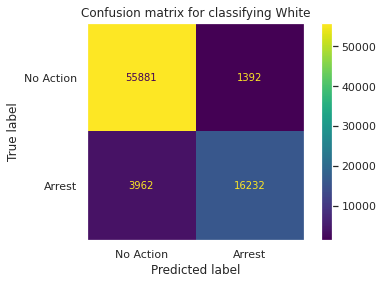

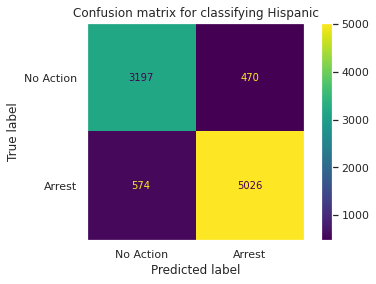

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion matrices for the kNN model

disp = ConfusionMatrixDisplay(cm_a, display_labels=['No Action','Arrest'])
disp.plot(values_format='d')
plt.grid(False)
plt.title("Confusion matrix for classifying White")

disp = ConfusionMatrixDisplay(cm_b, display_labels=['No Action','Arrest'])
disp.plot(values_format='d')
plt.grid(False)
plt.title("Confusion matrix for classifying Hispanic")
plt.show()

## Fairness: Independence, Separation, Sufficiency

In [41]:
#Probability of predicted class 1 (arrest) among Group A (White)

independence_a = (tp_a + fp_a) / (tn_a + fp_a + fn_a + tp_a)
independence_b = (tp_b + fp_b) / (tn_b + fp_b + fn_b + tp_b)

print('Independence race_White:\t',round(independence_a,2))
print('Independence race_Hispanic:\t',round(independence_b,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t\t',round(independence_a-independence_b,2))

Independence race_White:	 0.23
Independence race_Hispanic:	 0.59
Difference:			 -0.37


In [42]:
separation1_a = tp_a / (tp_a + fp_a)
separation1_b = tp_b / (tp_b + fp_b)

print('1. Separation race_White:\t',round(separation1_a,2))
print('1. Separation race_Hispanic:\t',round(separation1_b,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t\t',round(separation1_a-separation1_b,2))

1. Separation race_White:	 0.92
1. Separation race_Hispanic:	 0.91
Difference:			 0.01


In [43]:
separation2_a = tn_a / (tn_a + fn_a)
separation2_b = tn_b / (tn_b + fn_b)

print('2. Separation race_White:\t',round(separation2_a,2))
print('2. Separation race_Hispanic:\t',round(separation2_b,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t\t',round(separation2_a-separation2_b,2))

2. Separation race_White:	 0.93
2. Separation race_Hispanic:	 0.85
Difference:			 0.09


In [44]:
sufficiency1_a = tp_a / (tp_a + fn_a)
sufficiency1_b = tp_b / (tp_b + fn_b)

print('1. Sufficiency race_White:\t',round(sufficiency1_a,2))
print('1. Sufficiency race_Hispanic:\t',round(sufficiency1_b,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t\t',round(sufficiency1_a-sufficiency1_b,2))

1. Sufficiency race_White:	 0.8
1. Sufficiency race_Hispanic:	 0.9
Difference:			 -0.09


In [45]:
sufficiency2_a = fp_a / (fp_a + tn_a)
sufficiency2_b = fp_b / (fp_b + tn_b)

print('2. Sufficiency race_White:\t',round(sufficiency2_a,2))
print('2. Sufficiency race_Hispanic:\t',round(sufficiency2_b,2))

#As these values should be equal, their difference should be zero.
print('Difference:\t\t\t',round(sufficiency2_a-sufficiency2_b,2))

2. Sufficiency race_White:	 0.02
2. Sufficiency race_Hispanic:	 0.13
Difference:			 -0.1


In [ ]:
print(f"% tp race_White:\t {round(tp_a/(tp_a+fp_a+fn_a+tn_a),2)}")
print(f"% tp race_Hispanic:\t {round(tp_b/(tp_b+fp_b+fn_b+tn_b),2)}")

% tp race_White:	 0.21
% tp race_Hispanic:	 0.54


## **Result** 
We notice that the difference in the independence metric - i.e. the percentage of true and false positives in each subset - for White and Hispanic is -0.37, meaning that there are less positives in the race_White subset than in the race_Hispanic subset. The difference is both due to the higher false positive rate for race_Hispanic (0.13 vs 0.02), as well as a larger number of true positives in the subset (54% in race_Hispanic as opposed to 21% in race_White). This means that the result is not statistically independent from the sensitive attribute, and the model and the dataset are biased.

## DcT: performance and fairness (demonstration only)

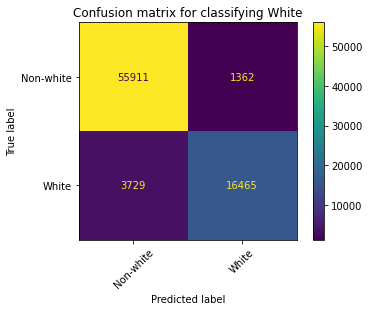

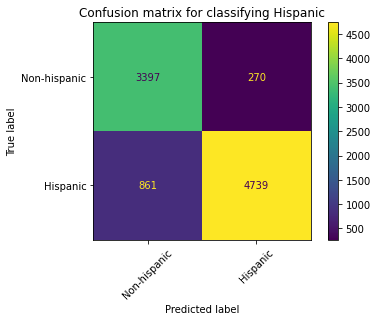

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

#Only for demonstration purposes:
#Confusion matrices for the DcT model

cm_dct_a = confusion_matrix(y_test[group_a], dct.predict(X_test)[group_a])
cm_dct_b = confusion_matrix(y_test[group_b], dct.predict(X_test)[group_b])

tn_dct_a, fp_dct_a, fn_dct_a, tp_dct_a = cm_dct_a.ravel()
tn_dct_b, fp_dct_b, fn_dct_b, tp_dct_b = cm_dct_b.ravel()

disp = ConfusionMatrixDisplay(cm_dct_a, display_labels=['Non-white','White'])
disp.plot(values_format='d')
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for classifying White")

disp = ConfusionMatrixDisplay(cm_dct_b, display_labels=['Non-hispanic','Hispanic'])
disp.plot(values_format='d')
plt.xticks(rotation=45)
plt.grid(False)
plt.title("Confusion matrix for classifying Hispanic")
plt.show()

In [32]:
#INDEPENDENCE

independence_dct_a = (tp_dct_a + fp_dct_a) / (tn_dct_a + fp_dct_a + fn_dct_a + tp_dct_a)
independence_dct_b = (tp_dct_b + fp_dct_b) / (tn_dct_b + fp_dct_b + fn_dct_b + tp_dct_b)

print('DcT Independence')
print('Independence race_White:\t',round(independence_dct_a,2))
print('Independence race_Hispanic:\t',round(independence_dct_b,2))
print('Difference:\t\t\t',round(independence_dct_a-independence_dct_b,2))

#SEPARATION

separation1_dct_a = tp_dct_a / (tp_dct_a + fp_dct_b)
separation1_dct_b = tp_dct_b / (tp_dct_b + fp_dct_b)

print('DcT Separation 1.')
print('1. Separation race_White:\t',round(separation1_dct_a,2))
print('1. Separation race_Hispanic:\t',round(separation1_dct_b,2))
print('Difference:\t\t\t',round(separation1_dct_a-separation1_dct_b,2))

separation2_dct_a = tn_dct_a / (tn_dct_a + fn_dct_b)
separation2_dct_b = tn_dct_b / (tn_dct_b + fn_dct_b)

print('DcT Separation 2.')
print('2. Separation race_White:\t',round(separation2_dct_a,2))
print('2. Separation race_Hispanic:\t',round(separation2_dct_b,2))
print('Difference:\t\t\t',round(separation2_dct_a-separation2_dct_b,2))

#SUFFICIENCY

sufficiency1_dct_a = tp_dct_a / (tp_dct_a + fn_dct_a)
sufficiency1_dct_b = tp_dct_b / (tp_dct_b + fn_dct_b)

print('1. Sufficiency race_White:\t',round(sufficiency1_dct_a,2))
print('1. Sufficiency race_Hispanic:\t',round(sufficiency1_dct_b,2))
print('Difference:\t\t\t',round(sufficiency1_dct_a-sufficiency1_dct_b,2))

sufficiency2_dct_a = fp_dct_a / (fp_dct_a + tn_dct_a)
sufficiency2_dct_b = fp_dct_b / (fp_dct_b + tn_dct_b)

print('2. Sufficiency race_White:\t',round(sufficiency2_dct_a,2))
print('2. Sufficiency race_Hispanic:\t',round(sufficiency2_dct_b,2))
print('Difference:\t\t\t',round(sufficiency2_dct_a-sufficiency2_dct_b,2))

DcT Independence
Independence race_White:	 0.23
Independence race_Hispanic:	 0.54
Difference:			 -0.31
DcT Separation 1.
1. Separation race_White:	 0.98
1. Separation race_Hispanic:	 0.95
Difference:			 0.04
DcT Separation 2.
2. Separation race_White:	 0.98
2. Separation race_Hispanic:	 0.8
Difference:			 0.19
1. Sufficiency race_White:	 0.82
1. Sufficiency race_Hispanic:	 0.85
Difference:			 -0.03
2. Sufficiency race_White:	 0.02
2. Sufficiency race_Hispanic:	 0.07
Difference:			 -0.05


# **Task 4:** Sensitive features

_Exclude the features you used as sensitive characteristics from the training of the model. Check the new model for fairness. Is it fairer now? Why/why not?_

Since  gender and race can be used to discriminate against the drivers (i.e. they are sensitive features), but we focus on race only, we will remove the race_white and race_Hispanic features from the dataset. From above analysis, we know that there is marginal difference between the models, so we do not use DcT anymore.

---

In [33]:
X_new=X[['driver_age','erratic_behavior','contraband_observed','contraband_found','driver_gender','speeding_violation',
         'dui_violation','other_violation','unsafe_violation', 'no_search', 'protective_frisk', 'incident', 'probable_cause']]

y_new = data_encoded['stop_outcome']
X_cv_new, X_test_new, y_cv_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=7)
X_train_new, X_valid_new, y_train_new, y_valid_new = train_test_split(X_cv_new, y_cv_new, test_size=0.3, stratify=y_cv, random_state=7)

scaler = StandardScaler()
# Replacing the values by the normalized ones
X_train_new.values[:] = scaler.fit_transform(X_train_new)
X_valid_new.values[:] = scaler.transform(X_valid_new)
X_test_new.values[:] = scaler.transform(X_test_new)

### kNN_new: Without the Sensitive Features

In [34]:
#knn_new: sensitive feature are excluded
knn_new = KNeighborsClassifier(n_neighbors=30)
knn_new.fit(X_train_new, y_train_new)
tn_knn_new, fp_knn_new, fn_knn_new, tp_knn_new = confusion_matrix(y_test_new, knn_new.predict(X_test_new)).ravel()

In [35]:
from sklearn import metrics

#True/false positives/negatives
print('True Positive of KNN_new:\t', tp_knn_new)
print('True Negative of KNN_new:\t',tn_knn_new)
print('False Positive of KNN_new:\t', fp_knn_new)
print('False Negative of KNN_new:\t', fn_knn_new)

#Standard metrics
recall_knn_manual_new = tp_knn_new/(tp_knn_new + fn_knn_new)
precision_knn_manual_new = tp_knn_new/(tp_knn_new + fp_knn_new)
print('Recall of KNN_new:\t\t',round(recall_knn_manual_new,2))
print('Precision of KNN_new:\t\t',round(precision_knn_manual_new,2))

f1_knn_manual_new = 2 * precision_knn_manual_new * recall_knn_manual_new / (precision_knn_manual_new + recall_knn_manual_new)
print('F1 of KNN_new:\t\t\t',round(f1_knn_manual_new,2))

accuracy_knn_new = metrics.accuracy_score(y_test_new, knn_new.predict(X_test_new))
print('Accuracy of KNN_new:\t\t', round(accuracy_knn_new, 2))

True Positive of KNN_new:	 30758
True Negative of KNN_new:	 80589
False Positive of KNN_new:	 2805
False Negative of KNN_new:	 6447
Recall of KNN_new:		 0.83
Precision of KNN_new:		 0.92
F1 of KNN_new:			 0.87
Accuracy of KNN_new:		 0.92


In [39]:
#Comparisons of the models with and without measures of independence

print("Performance\t", "With Sensitive\t", "Without Sensitive","\n",
      "True Positive\t\t", tp_knn, "\t\t", tp_knn_new, "\n",
      "True Negative\t\t", tn_knn, "\t\t", tn_knn_new, "\n",
      "False Positive\t\t", fp_knn, "\t\t", fp_knn_new, "\n",
      "False Negative\t\t", fn_knn, "\t\t", fn_knn_new, "\n",
      "Recall\t\t\t", round(recall_knn_manual,2), "\t\t", round(recall_knn_manual_new,2), "\n",
      "Precision\t\t", round(precision_knn_manual, 2), "\t\t", round(precision_knn_manual_new, 2), "\n",
      "F1\t\t\t", round(f1_knn_manual,2), "\t\t", round(f1_knn_manual_new,2), "\n",
      "Accuracy\t\t", round(accuracy_knn, 2), "\t\t", round(accuracy_knn_new, 2), "\n")

Performance	 With Sensitive	 Without Sensitive 
 True Positive		 30647 		 30758 
 True Negative		 80624 		 80589 
 False Positive		 2770 		 2805 
 False Negative		 6558 		 6447 
 Recall			 0.82 		 0.83 
 Precision		 0.92 		 0.92 
 F1			 0.87 		 0.87 
 Accuracy		 0.92 		 0.92 



### Fairness: Ind., Sep. & Suff. Without Sensitive Attributes

In [37]:
#Generating a confusion matrix based on the new model
cm_a_new = confusion_matrix(y_test_new[group_a], knn_new.predict(X_test_new)[group_a])
cm_b_new = confusion_matrix(y_test_new[group_b], knn_new.predict(X_test_new)[group_b])

tn_a_new, fp_a_new, fn_a_new, tp_a_new = cm_a_new.ravel()
tn_b_new, fp_b_new, fn_b_new, tp_b_new = cm_b_new.ravel()

In [51]:
#Generating metrics of fairness: independence, separation (1 and 2), and sufficiency (1 and 2)
independence_a_new = (tp_a_new + fp_a_new) / (tn_a_new + fp_a_new + fn_a_new + tp_a_new)
independence_b_new = (tp_b_new + fp_b_new) / (tn_b_new + fp_b_new + fn_b_new + tp_b_new)

separation1_a_new = tp_a_new / (tp_a_new + fp_a_new)
separation1_b_new = tp_b_new / (tp_b_new + fp_b_new)

separation2_a_new = tn_a_new / (tn_a_new + fn_a_new)
separation2_b_new = tn_b_new / (tn_b_new + fn_b_new)

sufficiency1_a_new = tp_a_new / (tp_a_new + fn_a_new)
sufficiency1_b_new = tp_b_new / (tp_b_new + fn_b_new)

sufficiency2_a_new = fp_a_new / (fp_a_new + tn_a_new)
sufficiency2_b_new = fp_b_new / (fp_b_new + tn_b_new)

print("Measure\t", "White\t", "Hispanic","\n",
"ind\t",round(independence_a_new, 2), "\t", round(independence_b_new,2), "\n",
"sep1\t", round(separation1_a_new,2), "\t",round(separation1_b_new,2), "\n",
"sep2\t", round(separation2_a_new,2), "\t",round(separation2_b_new,2), "\n",
"sep1\t", round(sufficiency1_a_new,2), "\t",round(sufficiency1_b_new,2), "\n",
"sep2\t", round(sufficiency2_a_new,2), "\t",round(sufficiency2_b_new,2), "\n")

print("Differences\t", "With Sensitive\t", "Without Sensitive","\n",
      "Independence\t\t", round(independence_a-independence_b,2), "\t\t", round(independence_a_new-independence_b_new,2), "\n",
      "Separation 1\t\t", round(separation1_a-separation1_b,2), "\t\t", round(separation1_a_new-separation1_b_new,2), "\n",
      "Separation 2\t\t", round(separation2_a-separation2_b,2), "\t\t", round(separation2_a_new-separation2_b_new,2), "\n",
      "Sufficiency 1\t\t", round(sufficiency1_a-sufficiency1_b,2), "\t\t", round(sufficiency1_a_new-sufficiency1_b_new,2), "\n",
      "Sufficiency 2\t\t", round(sufficiency2_a-sufficiency2_b,2), "\t\t", round(sufficiency2_a_new-sufficiency2_b_new,2), "\n"
      )

Measure	 White	 Hispanic 
 ind	 0.24 	 0.56 
 sep1	 0.91 	 0.94 
 sep2	 0.94 	 0.82 
 sep1	 0.82 	 0.87 
 sep2	 0.03 	 0.09 

Differences	 With Sensitive	 Without Sensitive 
 Independence		 -0.37 		 -0.33 
 Separation 1		 0.01 		 -0.03 
 Separation 2		 0.09 		 0.12 
 Sufficiency 1		 -0.09 		 -0.05 
 Sufficiency 2		 -0.1 		 -0.06 



##Result
After comparing the independence, separation, and sufficiency of both models, we conclude that the kNN model which is trained without the sensitive features (knn_new) is marginally _fairer_ while retaining similar performance. It is more independent and sufficient than the original model (knn), but there is a larger separation difference.

# **Task 5:** Different thresholds
*Try to align the fairness measures by simply using different thresholds for each group. Are you able to get a fair model? What do you observe?*

We need to compare the independence, seperation, sufficiency of model that trained with sensitive features and without sensitive features. We consider to take 0.25, 0.5, and 0.75 as the thresholds.




---

### Checking the Thresholds

In [52]:
#model trained with sensitive features
#transform the prediction as decimals which presents the probability of being 1
pred_proba = knn.predict_proba(X_test)[:, 1]
prob_placeholder = pred_proba.copy()

In [84]:
cm_a=[]
accuracy_range = []
recall_range = []
precision_range = []
f1_range = []
thresholds = np.arange(0.05,1.00,0.05)
y_test_grp = y_test.copy()
y_test_grp = y_test_grp[group_a]

for my_threshold in thresholds:
  pred_proba = prob_placeholder.copy()
  pred_proba = pred_proba[group_a]

  pred_proba[np.where(pred_proba >= my_threshold)]=1
  pred_proba[np.where(pred_proba < my_threshold)]=0

  accuracy_range.append(metrics.accuracy_score(y_test_grp, pred_proba))
  recall_range.append(metrics.recall_score(y_test_grp, pred_proba))
  precision_range.append(metrics.precision_score(y_test_grp, pred_proba)) 
  f1_range.append(metrics.f1_score(y_test_grp, pred_proba))  
  
  cm_a_ = confusion_matrix(y_test_grp, pred_proba)

  cm_a.append(cm_a_)

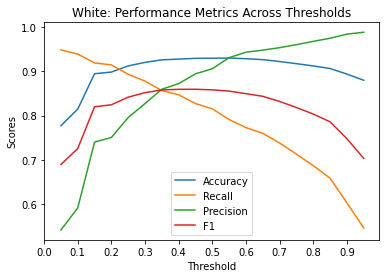

In [85]:
plt.plot(thresholds, accuracy_range, label = 'Accuracy')
plt.plot(thresholds, recall_range, label = 'Recall')
plt.plot(thresholds, precision_range, label = 'Precision')
plt.plot(thresholds, f1_range, label = 'F1')
plt.legend()
plt.xticks(np.arange(min(thresholds)-0.05, max(thresholds)+0.05, 0.1))
plt.title('White: Performance Metrics Across Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Scores')
plt.show()

In [86]:
cm_b=[]
accuracy_range = []
recall_range = []
precision_range = []
f1_range = []
thresholds = np.arange(0.05,1.00,0.05)
y_test_grp = y_test.copy()
y_test_grp = y_test_grp[group_b]

for my_threshold in thresholds:
  pred_proba = prob_placeholder.copy()
  pred_proba = pred_proba[group_b]

  pred_proba[np.where(pred_proba >= my_threshold)]=1
  pred_proba[np.where(pred_proba < my_threshold)]=0
  
  accuracy_range.append(metrics.accuracy_score(y_test_grp, pred_proba))
  recall_range.append(metrics.recall_score(y_test_grp, pred_proba))
  precision_range.append(metrics.precision_score(y_test_grp, pred_proba)) 
  f1_range.append(metrics.f1_score(y_test_grp, pred_proba))  
  
  cm_b_ = confusion_matrix(y_test_grp, pred_proba)

  cm_b.append(cm_b_)

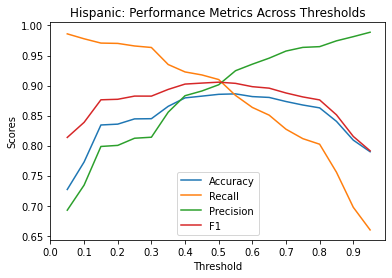

In [87]:
plt.plot(thresholds, accuracy_range, label = 'Accuracy')
plt.plot(thresholds, recall_range, label = 'Recall')
plt.plot(thresholds, precision_range, label = 'Precision')
plt.plot(thresholds, f1_range, label = 'F1')
plt.legend()
plt.xticks(np.arange(min(thresholds)-0.05, max(thresholds)+0.05, 0.1))
plt.title('Hispanic: Performance Metrics Across Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Scores')
plt.show()

###Fairness: Ind., Sep. & Suff. at Each Threshold

In [88]:
independence_a_t = []
independence_b_t = []
separation1_a_t = []
separation1_b_t = []
separation2_a_t = []
separation2_b_t = []
sufficiency1_a_t = []
sufficiency1_b_t = []
sufficiency2_a_t = []
sufficiency2_b_t = []

for cm_a_t,cm_b_t in zip(cm_a,cm_b):
  tn_a_t, fp_a_t, fn_a_t, tp_a_t = cm_a_t.ravel()
  tn_b_t, fp_b_t, fn_b_t, tp_b_t = cm_b_t.ravel()
  #independence
  independence_a_t.append((tp_a_t + fp_a_t) / (tn_a_t + fp_a_t + fn_a_t + tp_a_t))
  independence_b_t.append((tp_b_t + fp_b_t) / (tn_b_t + fp_b_t + fn_b_t + tp_b_t)) 
  #separation1
  separation1_a_t.append(tp_a_t / (tp_a_t + fp_a_t)) 
  separation1_b_t.append(tp_b_t / (tp_b_t + fp_b_t))
  #separation2
  separation2_a_t.append(tn_a_t / (tn_a_t + fn_a_t))
  separation2_b_t.append(tn_b_t / (tn_b_t + fn_b_t))
  #sufficiency1
  sufficiency1_a_t.append(tp_a_t / (tp_a_t + fn_a_t))
  sufficiency1_b_t.append(tp_b_t / (tp_b_t + fn_b_t))
  #sufficiency2
  sufficiency2_a_t.append(fp_a_t / (fp_a_t + tn_a_t))
  sufficiency2_b_t.append(fp_b_t / (fp_b_t + tn_b_t))

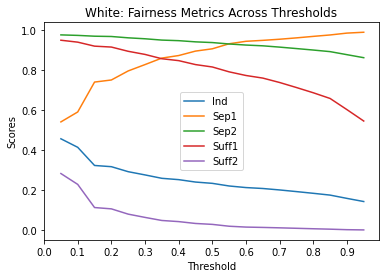

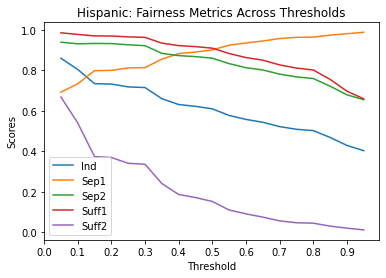

In [89]:
plt.plot(thresholds, independence_a_t, label = "Ind")
plt.plot(thresholds, separation1_a_t, label = "Sep1")
plt.plot(thresholds, separation2_a_t, label = "Sep2")
plt.plot(thresholds, sufficiency1_a_t, label = "Suff1")
plt.plot(thresholds, sufficiency2_a_t, label = "Suff2")
plt.title('White: Fairness Metrics Across Thresholds')
plt.legend()
plt.xticks(np.arange(min(thresholds)-0.05, max(thresholds)+0.05, 0.1))
plt.xlabel('Threshold')
plt.ylabel('Scores')
plt.show()

plt.plot(thresholds, independence_b_t, label = "Ind")
plt.plot(thresholds, separation1_b_t, label = "Sep1")
plt.plot(thresholds, separation2_b_t, label = "Sep2")
plt.plot(thresholds, sufficiency1_b_t, label = "Suff1")
plt.plot(thresholds, sufficiency2_b_t, label = "Suff2")
plt.legend()
plt.xticks(np.arange(min(thresholds)-0.05, max(thresholds)+0.05, 0.1))
plt.title('Hispanic: Fairness Metrics Across Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Scores')
plt.show()

In [92]:
#The code below evaluates differences by subtracting metric-relevant Hispanic value for each threshold
#from White value for each threshold, therefore creating a threshold*threshold array of differences

difference = []
indices = []
for i in independence_a_t:
  for j in independence_b_t:
    difference.append(i-j)
    indices.append(f"{independence_a_t.index(i)}-{independence_b_t.index(j)}")

#This code is used to find the minimum difference by taking the absolute value
#(to avoid issues with - and + signs)
#Then it prints the White-Hispanic indices which were subtracted
#to generate this minimum difference

print("INDEPENDENCE")
print(np.min(np.abs(difference)))
print(difference.index(np.min(np.abs(difference))))
print(indices[difference.index(np.min(np.abs(difference)))])

difference = []
indices = []
for i in separation1_a_t:
  for j in separation1_b_t:
    difference.append(i-j)
    indices.append(f"{separation1_a_t.index(i)}-{separation1_b_t.index(j)}")

print("SEPARATION 1")
print(np.min(np.abs(difference)))
print(difference.index(-np.min(np.abs(difference))))
print(indices[difference.index(-np.min(np.abs(difference)))])

difference = []
indices = []
for i in separation2_a_t:
  for j in separation2_b_t:
    difference.append(i-j)
    indices.append(f"{separation2_a_t.index(i)}-{separation2_b_t.index(j)}")

print("SEPARATION 2")
print(np.min(np.abs(difference)))
print(difference.index(np.min(np.abs(difference))))
print(indices[difference.index(np.min(np.abs(difference)))])

difference = []
indices = []
for i in sufficiency1_a_t:
  for j in sufficiency1_b_t:
    difference.append(i-j)
    indices.append(f"{sufficiency1_a_t.index(i)}-{sufficiency1_b_t.index(j)}")

print("SUFFICIENCY 1")
print(np.min(np.abs(difference)))
print(difference.index(-np.min(np.abs(difference))))
print(indices[difference.index(-np.min(np.abs(difference)))])


difference = []
indices = []
for i in sufficiency2_a_t:
  for j in sufficiency2_b_t:
    difference.append(i-j)
    indices.append(f"{sufficiency2_a_t.index(i)}-{sufficiency2_b_t.index(j)}")

print("SUFFICIENCY 2")
print(np.min(np.abs(difference)))
print(difference.index(-np.min(np.abs(difference))))
print(indices[difference.index(-np.min(np.abs(difference)))])



INDEPENDENCE
0.011231932731935623
37
1-18
SEPARATION 1
0.00015531975692295585
360
18-18
SEPARATION 2
0.0009800171685526715
152
8-0
SUFFICIENCY 1
9.551988568035075e-05
165
8-13
SUFFICIENCY 2
0.0004304350101438613
187
9-16


In [96]:
thresholds
#The above #-# indices correspond with thresholds for White and Hispanic subsets
#Smallest differences are where:
#Independence: White = 0.10, Hispanic = 0.95
#Separation 1: White = 0.95, Hispanic = 0.95
#Separation 2: White = 0.45, Hispanic = 0.05
#Sufficiency 1: White = 0.45, Hispanic = 0.70
#Sufficiency 2: White = 0.50, Hispanic = 0.90

white_thresholds = [0.10, 0.95, 0.45, 0.45, 0.50]
hispanic_thresholds = [0.95, 0.95, 0.05, 0.70, 0.90]

#Once we have all minimum differences for all metrics
#we take the arithmetic mean
print(round(np.mean(white_thresholds),2))
print(round(np.mean(hispanic_thresholds),2))

0.49
0.71


### kNN (pred_proba): Appropriate Thresholds

In [99]:
#Setting up a model with different thresholds for different groups

pred_proba = knn.predict_proba(X_test)[:, 1]

pred_proba_a = pred_proba[group_a]
pred_proba_b = pred_proba[group_b]
ytest_grp_a = y_test[group_a]
ytest_grp_b = y_test[group_b]

pred_proba_a[np.where(pred_proba_a >= 0.49)]=1
pred_proba_a[np.where(pred_proba_a < 0.49)]=0
pred_proba_b[np.where(pred_proba_b >= 0.71)]=1
pred_proba_b[np.where(pred_proba_b < 0.71)]=0

cm_a_z = confusion_matrix(ytest_grp_a, pred_proba_a)
cm_b_z = confusion_matrix(ytest_grp_b, pred_proba_b)

tn_a_z, fp_a_z, fn_a_z, tp_a_z = cm_a_z.ravel()
tn_b_z, fp_b_z, fn_b_z, tp_b_z = cm_b_z.ravel()

#independence
independence_a_z = ((tp_a_z + fp_a_z) / (tn_a_z + fp_a_z + fn_a_z + tp_a_z))
independence_b_z = ((tp_b_z + fp_b_z) / (tn_b_z + fp_b_z + fn_b_z + tp_b_z))
#separation1
separation1_a_z = (tp_a_z / (tp_a_z + fp_a_z)) 
separation1_b_z = (tp_b_z / (tp_b_z + fp_b_z))
#separation2
separation2_a_z = (tn_a_z / (tn_a_z + fn_a_z))
separation2_b_z = (tn_b_z / (tn_b_z + fn_b_z))
#sufficiency1
sufficiency1_a_z = (tp_a_z / (tp_a_z + fn_a_z))
sufficiency1_b_z = (tp_b_z / (tp_b_z + fn_b_z))
#sufficiency2
sufficiency2_a_z = (fp_a_z / (fp_a_z + tn_a_z))
sufficiency2_b_z = (fp_b_z / (fp_b_z + tn_b_z))

White
accuracy	 0.9297894587372688
recall	 0.8152916707933049
precision	 0.9059593903042976
f1	 0.8582375478927202
Hispanic
accuracy	 0.8734218193590159
recall	 0.8273214285714285
precision	 0.9574292209134119
f1	 0.8876329150301753
INDEPENDENCE
 White	 0.23459021260665833 
 Hispanic	 0.5221754613143412 
 Difference	 -0.2875852487076829
INDEPENDENCE
 White	 0.9059593903042976 
 Hispanic	 0.9574292209134119 
 Difference	 -0.05146983060911425
INDEPENDENCE
 White	 0.937093129153034 
 Hispanic	 0.7816169828364951 
 Difference	 0.15547614631653894
INDEPENDENCE
 White	 0.8152916707933049 
 Hispanic	 0.8273214285714285 
 Difference	 -0.012029757778123651
INDEPENDENCE
 White	 0.029839540446632794 
 Hispanic	 0.056176711208071994 
 Difference	 -0.0263371707614392


In [104]:
#Final results of the thresholding attempts
#Printing the results

print("White")
print("accuracy\t", round(metrics.accuracy_score(ytest_grp_a, pred_proba_a),2))
print("recall\t\t", round(metrics.recall_score(ytest_grp_a, pred_proba_a),2))
print("precision\t", round(metrics.precision_score(ytest_grp_a, pred_proba_a),2)) 
print("f1\t\t", round(metrics.f1_score(ytest_grp_a, pred_proba_a),2))  

print("Hispanic")
print("accuracy\t",round(metrics.accuracy_score(ytest_grp_b, pred_proba_b),2))
print("recall\t\t",round(metrics.recall_score(ytest_grp_b, pred_proba_b),2))
print("precision\t",round(metrics.precision_score(ytest_grp_b, pred_proba_b),2)) 
print("f1\t\t",round(metrics.f1_score(ytest_grp_b, pred_proba_b),2))  

print("INDEPENDENCE\n", "White\t\t", round(independence_a_z,2), "\n", "Hispanic\t", round(independence_b_z,2), "\n", "Difference\t", round(independence_a_z - independence_b_z,2))
print("SEPARATION 1\n", "White\t\t", round(separation1_a_z,2), "\n", "Hispanic\t", round(separation1_b_z,2), "\n", "Difference\t", round(separation1_a_z - separation1_b_z,2))
print("SEPARATION 2\n", "White\t\t", round(separation2_a_z,2), "\n", "Hispanic\t", round(separation2_b_z,2), "\n", "Difference\t", round(separation2_a_z - separation2_b_z,2))
print("SUFFICIENCY 1\n", "White\t\t", round(sufficiency1_a_z,2), "\n", "Hispanic\t", round(sufficiency1_b_z,2), "\n", "Difference\t", round(sufficiency1_a_z - sufficiency1_b_z,2))
print("SUFFICIENCY 2\n", "White\t\t", round(sufficiency2_a_z,2), "\n", "Hispanic\t", round(sufficiency2_b_z,2), "\n", "Difference\t", round(sufficiency2_a_z - sufficiency2_b_z,2))

White
accuracy	 0.93
recall		 0.82
precision	 0.91
f1		 0.86
Hispanic
accuracy	 0.87
recall		 0.83
precision	 0.96
f1		 0.89
INDEPENDENCE
 White		 0.23 
 Hispanic	 0.52 
 Difference	 -0.29
SEPARATION 1
 White		 0.91 
 Hispanic	 0.96 
 Difference	 -0.05
SEPARATION 2
 White		 0.94 
 Hispanic	 0.78 
 Difference	 0.16
SUFFICIENCY 1
 White		 0.82 
 Hispanic	 0.83 
 Difference	 -0.01
SUFFICIENCY 2
 White		 0.03 
 Hispanic	 0.06 
 Difference	 -0.03


##Result
After comparing the independence, separation and sufficiency scores for every .05 threshold between 0.05 - 0.95, we can conclude that the 0.71 threshold for Hispanic and 0.49 threshold for White are the "best" solution. Limitation of this estimation is that we are not weighing either metric as more relevant, but are rather taking an arithmetic average of the thresholds at the lowest differences for all metrics. Our goal has been to reduce independence as much as possible, without leading to a massive trade-off in separation or sufficiency. However, there was no heuristic that we could think of (except for the mean), that allowed us to find an optimal value in this trade-off.

# Appendix: Other Attempts in Debiasing the Model
The Appendix features snippets of code that were initially used to attempt and debias the model (i.e. make it more fair). The code below this line is **not project-relevant**, but please keep in mind that it is an example of the effort we took to make sure we had a proper approach. We therefore ask you not to evaluate the formatting, readability or relevance of the code.

###kNN_new: Thresholding without sensitive features

In [ ]:
#new model trained without sensitive features
cm_a__new=[]
cm_b__new=[]

#transform the prediction as decimals which presents the probility of being 1
pred_proba_new = knn_new.predict_proba(X_test_new)[:, 1]
proba_placeholder_new = pred_proba_new.copy()  

In [ ]:
for my_threshold in (0.25,0.5,0.75):
  print('my_threshold is :',my_threshold)
  
  pred_proba_new = proba_placeholder_new.copy()
  print('Original knn_new predictions:',pred_proba_new)
  pred_proba_new[np.where( pred_proba_new >= my_threshold)]=1
  pred_proba_new[np.where( pred_proba_new < my_threshold)]=0
  print('Thresholded knn_new predictions:',pred_proba_new)

  #print('Confusion matrix:\n',confusion_matrix(y_test_new, pred_proba_new))
  accuracy = metrics.accuracy_score(y_test_new, pred_proba_new)
  recall = metrics.recall_score(y_test_new, pred_proba_new, average="micro")
  precision = metrics.precision_score(y_test_new, pred_proba_new, average="micro")
  F1 = metrics.f1_score(y_test_new, pred_proba_new, average="micro")  
  print("accuracy:",  accuracy, '\n', "precision:", precision, '\n', "recall:", recall, '\n', "F1 :",  F1)
  
  cm_a_new = confusion_matrix(y_test_new[group_a], pred_proba_new[group_a])
  cm_b_new = confusion_matrix(y_test_new[group_b], pred_proba_new[group_b])

  cm_a__new.append(cm_a_new)
  cm_b__new.append(cm_b_new)

my_threshold is : 0.25
Original knn_new predictions: [0.         1.         0.53333333 ... 0.1        0.16666667 0.1       ]
Thresholded knn_new predictions: [0. 1. 1. ... 0. 0. 0.]
accuracy: 0.8982164031210872 
 precision: 0.8982164031210872 
 recall: 0.8982164031210872 
 F1 : 0.8982164031210872
my_threshold is : 0.5
Original knn_new predictions: [0.         1.         0.53333333 ... 0.1        0.16666667 0.1       ]
Thresholded knn_new predictions: [0. 1. 1. ... 0. 0. 0.]
accuracy: 0.9224040000331678 
 precision: 0.9224040000331678 
 recall: 0.9224040000331678 
 F1 : 0.9224040000331679
my_threshold is : 0.75
Original knn_new predictions: [0.         1.         0.53333333 ... 0.1        0.16666667 0.1       ]
Thresholded knn_new predictions: [0. 1. 0. ... 0. 0. 0.]
accuracy: 0.9073541239977114 
 precision: 0.9073541239977114 
 recall: 0.9073541239977114 
 F1 : 0.9073541239977114


###Fairness: I.S.S. of kNN_new

Threshold: 0.25


<Figure size 432x288 with 0 Axes>

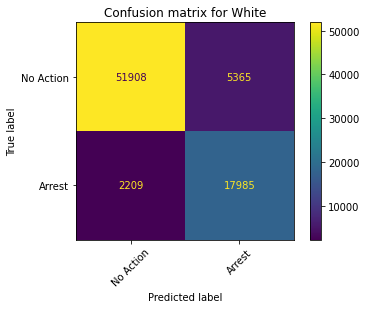

<Figure size 432x288 with 0 Axes>

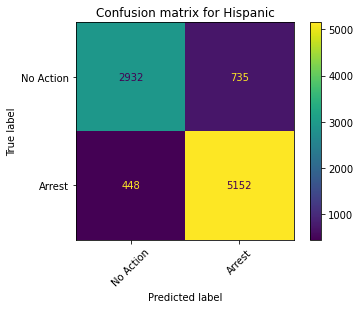

Independence White:	 0.3
Independence Hispanic:	 0.64
Difference:		 -0.33
1. Separation White:	 0.77
1. Separation Hispanic:	 0.88
Difference:		 -0.1
2. Separation White:	 0.96
2. Separation Hispanic:	 0.87
Difference:		 0.09
1. Sufficiency White:	 0.89
1. Sufficiency Hispanic:	 0.92
Difference:		 -0.03
2. Sufficiency White:	 0.09
2. Sufficiency Hispanic:	 0.2
Difference:		 -0.11 

Threshold: 0.5


<Figure size 432x288 with 0 Axes>

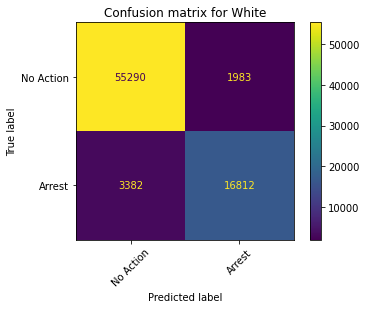

<Figure size 432x288 with 0 Axes>

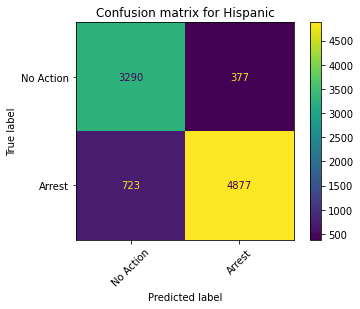

Independence White:	 0.24
Independence Hispanic:	 0.57
Difference:		 -0.32
1. Separation White:	 0.89
1. Separation Hispanic:	 0.93
Difference:		 -0.03
2. Separation White:	 0.94
2. Separation Hispanic:	 0.82
Difference:		 0.12
1. Sufficiency White:	 0.83
1. Sufficiency Hispanic:	 0.87
Difference:		 -0.04
2. Sufficiency White:	 0.03
2. Sufficiency Hispanic:	 0.1
Difference:		 -0.07 

Threshold: 0.75


<Figure size 432x288 with 0 Axes>

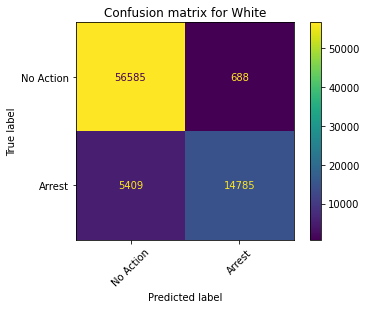

<Figure size 432x288 with 0 Axes>

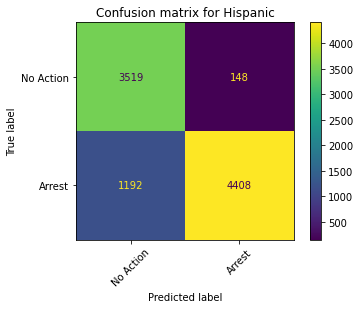

Independence White:	 0.2
Independence Hispanic:	 0.49
Difference:		 -0.29
1. Separation White:	 0.96
1. Separation Hispanic:	 0.97
Difference:		 -0.01
2. Separation White:	 0.91
2. Separation Hispanic:	 0.75
Difference:		 0.17
1. Sufficiency White:	 0.73
1. Sufficiency Hispanic:	 0.79
Difference:		 -0.05
2. Sufficiency White:	 0.01
2. Sufficiency Hispanic:	 0.04
Difference:		 -0.03 



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
a=0.25
for cm_a_new,cm_b_new in zip(cm_a__new,cm_b__new):
  print('\033[1mThreshold:\033[0m',a)
  
  tn_a_new, fp_a_new, fn_a_new, tp_a_new = cm_a_new.ravel()
  tn_b_new, fp_b_new, fn_b_new, tp_b_new = cm_b_new.ravel()

  plt.figure()
  disp = ConfusionMatrixDisplay(confusion_matrix=cm_a_new, display_labels=['No Action','Arrest'])
  disp.plot(values_format='d')
  plt.xticks(rotation=45)
  plt.grid(False)
  plt.title("Confusion matrix for White")
  #plt.savefig(f"erratic_behavior_{a}.png")
  #files.download(f"erratic_behavior_{a}.png") 
  plt.show()

  plt.figure()
  disp = ConfusionMatrixDisplay(confusion_matrix=cm_b_new, display_labels=['No Action','Arrest'])
  disp.plot(values_format='d')
  plt.xticks(rotation=45)
  plt.grid(False)
  plt.title("Confusion matrix for Hispanic")
  #plt.savefig(f"contraband_found_{a}.png")
  #files.download(f"contraband_found_{a}.png") 
  plt.show()
  a+=0.25
  
  independence_a_new = (tp_a_new + fp_a_new) / (tn_a_new + fp_a_new + fn_a_new + tp_a_new)
  independence_b_new = (tp_b_new + fp_b_new) / (tn_b_new + fp_b_new + fn_b_new + tp_b_new)

  print('Independence White:\t',round(independence_a_new,2))
  print('Independence Hispanic:\t',round(independence_b_new,2))
  #As these values should be equal, their difference should be zero.
  print('Difference:\t\t',round(independence_a_new-independence_b_new,2))

  #Separation:
  separation1_a_new = tp_a_new / (tp_a_new + fp_a_new)
  separation1_b_new = tp_b_new / (tp_b_new + fp_b_new)
  print('1. Separation White:\t',round(separation1_a_new,2))
  print('1. Separation Hispanic:\t',round(separation1_b_new,2))
  #As these values should be equal, their difference should be zero.
  print('Difference:\t\t',round(separation1_a_new-separation1_b_new,2))

  separation2_a_new = tn_a_new / (tn_a_new + fn_a_new)
  separation2_b_new = tn_b_new / (tn_b_new + fn_b_new)
  print('2. Separation White:\t',round(separation2_a_new,2))
  print('2. Separation Hispanic:\t',round(separation2_b_new,2))
  #As these values should be equal, their difference should be zero.
  print('Difference:\t\t',round(separation2_a_new-separation2_b_new,2))

  #Sufficiency:
  sufficiency1_a_new = tp_a_new / (tp_a_new + fn_a_new)
  sufficiency1_b_new = tp_b_new / (tp_b_new + fn_b_new)
  print('1. Sufficiency White:\t',round(sufficiency1_a_new,2))
  print('1. Sufficiency Hispanic:\t',round(sufficiency1_b_new,2))
  #As these values should be equal, their difference should be zero.
  print('Difference:\t\t',round(sufficiency1_a_new-sufficiency1_b_new,2))

  sufficiency2_a_new = fp_a_new / (fp_a_new + tn_a_new)
  sufficiency2_b_new = fp_b_new / (fp_b_new + tn_b_new)

  print('2. Sufficiency White:\t',round(sufficiency2_a_new,2))
  print('2. Sufficiency Hispanic:\t',round(sufficiency2_b_new,2))

  #As these values should be equal, their difference should be zero.
  print('Difference:\t\t',round(sufficiency2_a_new-sufficiency2_b_new,2),'\n')
  